# Sales Data Analysis and Reporting for a Retail Chain


# Project Plan

The aim of this project is to use Python to analyze sales
data and generate meaningful reports for a retail chain.

# Data Source

•TransactionID: A unique identifier for each transaction.

•TransactionTime: The time the transaction took place.

•ItemCode: The code of the item purchased.

•ItemDescription: A description of the item purchased.

•Number Of Items Purchased: The number of items purchased in the transaction.

•CostPerItem: The cost per item.

•Country: The country where the transaction took place.

In [29]:
#Installing libraries
import pandas as pd
import numpy as np

In [30]:
trxn= pd.read_csv('/content/Retail_Data_Transactions.csv')

In [31]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [32]:
response= pd.read_csv('/content/Retail_Data_Response.csv')

In [33]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [34]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [35]:
# Features

df.dtypes
df.shape
df.head()
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [36]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [37]:
# Missing values

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [38]:
(31/1250000)*100

0.00248

In [39]:
df=df.dropna()

In [40]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [41]:
# Change dtype

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

<ipython-input-41-b613fb24e519>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
<ipython-input-41-b613fb24e519>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']= df['response'].astype('int64')


In [42]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [43]:
set(df['response'])

{0, 1}

In [44]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

# Data Exploration

In [45]:
# Check for outliers
#Z-SCORE
from scipy import stats
#calc z score
z_score= np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold= 3

outliers= z_score>threshold


print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 124969, dtype: bool]


In [46]:
# Check for outliers
#Z-SCORE
from scipy import stats
#calc z score
z_score= np.abs(stats.zscore(df['response']))

#set a threshold

threshold= 3

outliers= z_score>threshold


print([outliers])

[0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: response, Length: 124969, dtype: bool]


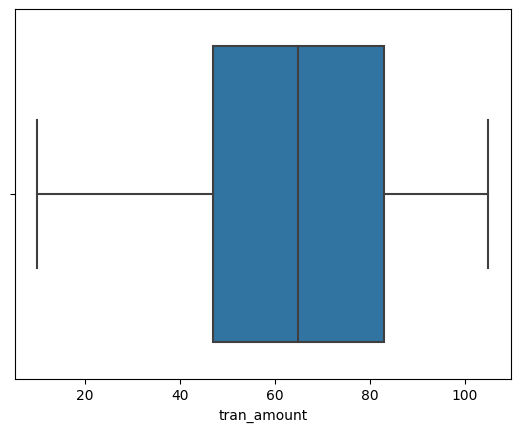

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [48]:
# Creating new columns

df['month']=df['trans_date'].dt.month

<ipython-input-48-dd33c10ea5b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


In [49]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [50]:
# Which 3 month have the highest transaction amounts?

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


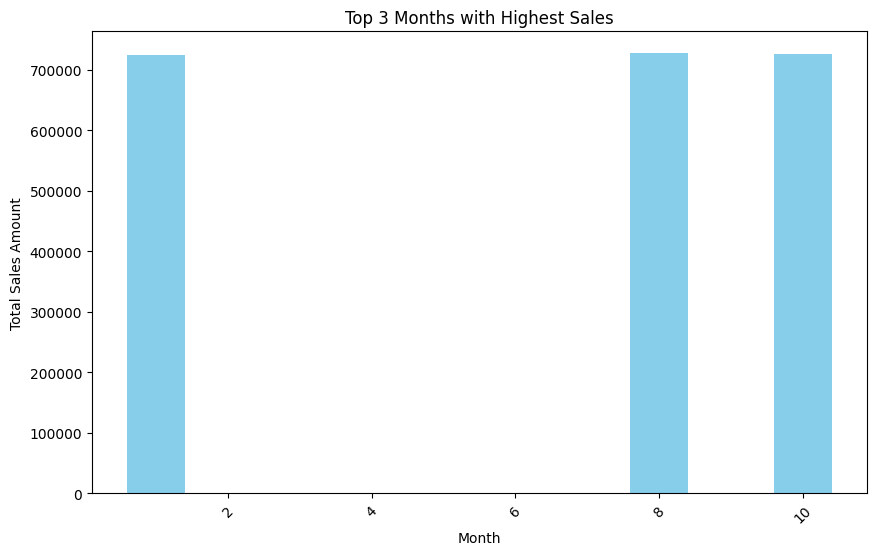

In [79]:
# Extract data for plotting
months = monthly_Sales['month']
sales = monthly_Sales['tran_amount']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, sales, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Top 3 Months with Highest Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

These outcomes indicate the total sales or transaction amounts for each of the three respective months in your dataset. The numbers represent the sum of all transaction amounts for the specified months.

For example, in August, the total transaction amount was $726,775, which means that all transactions that occurred in August in your dataset added up to this total. Similarly, the other two months, October and January, have their respective total transaction amounts.

These outcomes can be useful for various purposes, such as identifying the months with the highest sales or analyzing trends.

In [52]:
# Which 5 Customers having highest num of orders

customer_counts =df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
customer_counts

# Sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

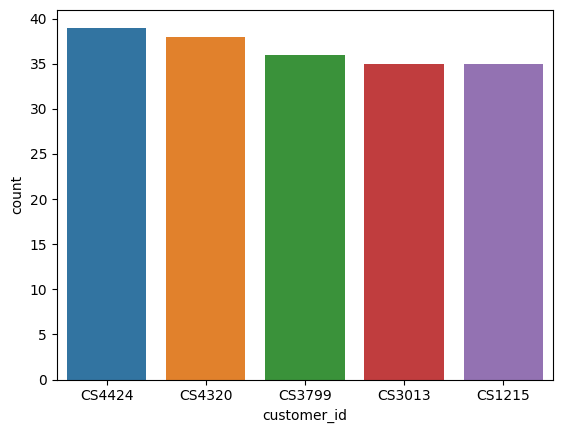

In [53]:
sns.barplot(x='customer_id', y='count', data=top_5_cus)

1.Customer "CS4424" has the highest number of orders with a count of 39.

2.Customer "CS4320" follows closely with 38 orders.

3.Customer "CS3799" has the third-highest count with 36 orders.

4.Customers "CS3013" and "CS1215" both have 35 orders, making them the fourth and fifth in the ranking.


This information can be valuable for understanding which customers are the most active or generate the most business for your company.

In [80]:
# customers having highest value of order
customer_sales =df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# sort

top_5_sales= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

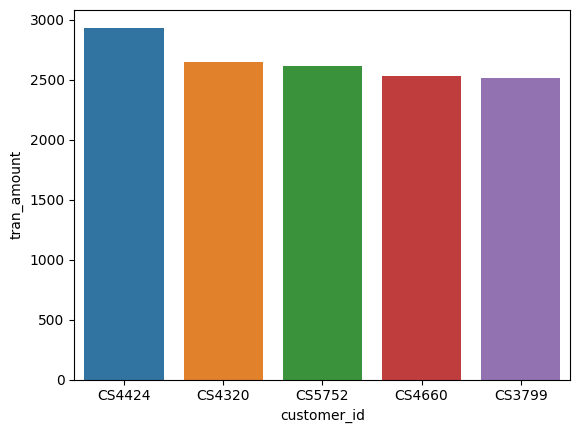

In [57]:
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sales)

1.Customer "CS4424" has the highest total order value of $2,933.

2.Customer "CS4320" follows with a total order value of $2,647.

3.Customer "CS5752" is third with a total order value of $2,612.

4.Customer "CS4660" ranks fourth with a total order value of $2,527.

5.Customer "CS3799" is fifth with a total order value of $2,513.


This information is valuable for identifying the customers who have made the largest monetary contributions to your business in terms of total order values.

# Advanced Analysis

In [58]:
# Time Series Analysis
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')

<ipython-input-58-549f4d959976>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


In [59]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [60]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index= monthly_sales.index.to_timestamp()
monthly_sales

month_year
2011-05-01     98901
2011-06-01    174527
2011-07-01    178038
2011-08-01    188605
2011-09-01    169173
2011-10-01    182613
2011-11-01    166830
2011-12-01    181326
2012-01-01    177969
2012-02-01    170135
2012-03-01    180453
2012-04-01    167955
2012-05-01    178880
2012-06-01    172933
2012-07-01    178964
2012-08-01    179164
2012-09-01    174813
2012-10-01    181621
2012-11-01    178998
2012-12-01    173657
2013-01-01    181729
2013-02-01    160233
2013-03-01    181389
2013-04-01    173642
2013-05-01    185826
2013-06-01    176813
2013-07-01    180983
2013-08-01    180031
2013-09-01    176830
2013-10-01    181521
2013-11-01    177341
2013-12-01    180802
2014-01-01    184554
2014-02-01    154151
2014-03-01    179804
2014-04-01    174149
2014-05-01    169555
2014-06-01    172741
2014-07-01    179026
2014-08-01    178975
2014-09-01    173385
2014-10-01    179303
2014-11-01    174855
2014-12-01    174010
2015-01-01    179837
2015-02-01    160509
2015-03-01     94829
Fr

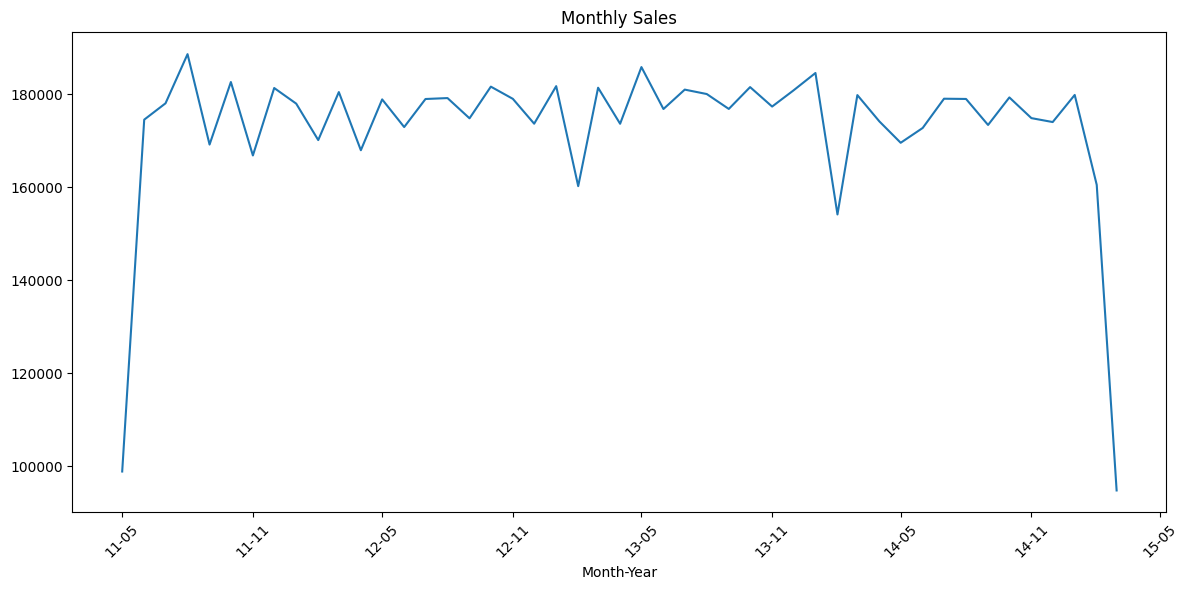

In [61]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1."The highest monthly sales occurred in August 2011, with a total of $188,605."

2."There's a noticeable seasonality in sales, with peaks around the end of the year."

3."Sales show a declining trend from early 2013 to early 2014."

4."Sales started to recover in early 2014 and remained relatively stable afterward."

In [62]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [63]:
## Cohort Segmentation

In [64]:
# Recency
recency= df.groupby('customer_id')['trans_date'].max()

#Frequency

frequency= df.groupby('customer_id')['trans_date'].count()

# Monetory

monetary= df.groupby('customer_id')['tran_amount'].sum()

#Combine

rfm= pd.DataFrame({'recency':recency, 'frequency':frequency,'monetary':monetary})

In [65]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [66]:
#Customer segmentation

def segment_customer(row):
  if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
       return 'P0'
  elif(2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
       return 'P1'
  else:
      return 'P2'

rfm['Segment']= rfm.apply(segment_customer, axis=1)

In [67]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [68]:
# Churn Analysis

In [69]:
# Count the number of churned and active customers
churn_counts= df['response'].value_counts()
churn_counts

0    111127
1     13842
Name: response, dtype: int64

<Axes: >

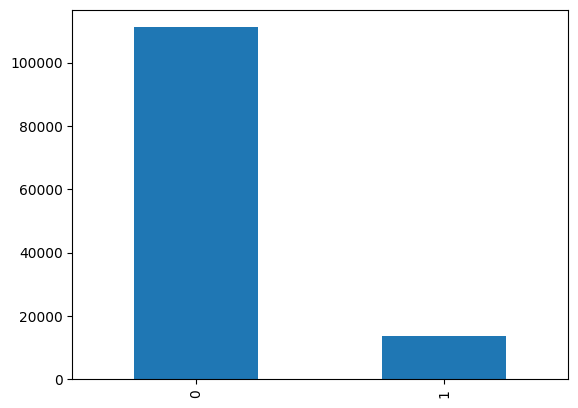

In [70]:
#plot
churn_counts.plot(kind='bar')

In [71]:
# Analyzing top customers

<Axes: xlabel='month_year'>

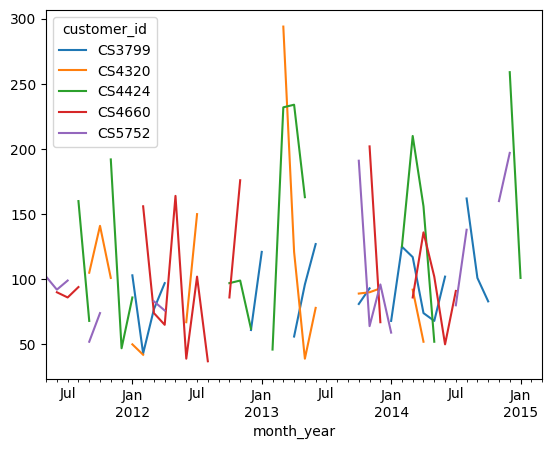

In [72]:
top_5_cus= monetary.sort_values(ascending=False).head(5).index


top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [82]:
top_customer_sales

customer_id,CS3799,CS4320,CS4424,CS4660,CS5752
month_year,,,,,
2011-05,NaN,50.0,80.0,NaN,102.0
2011-06,181.0,NaN,NaN,90.0,92.0
2011-07,NaN,172.0,NaN,86.0,99.0
2011-08,NaN,NaN,160.0,94.0,NaN
2011-09,95.0,105.0,68.0,NaN,52.0
2011-10,NaN,141.0,NaN,NaN,74.0
2011-11,85.0,101.0,192.0,NaN,NaN
2011-12,NaN,NaN,47.0,53.0,173.0
2012-01,103.0,50.0,86.0,NaN,NaN


1."The line for CS4424 shows consistent sales strength, suggesting a loyal and high-value customer."

2."CS4660 and CS5752 exhibit fluctuating patterns, indicating potential opportunities for targeted marketing during peak months."

3."CS4320 and CS3799 display stable purchasing behaviors, making them reliable customers."

In [74]:
df.to_csv('MainData.csv')

In [75]:
rfm.to_csv('AddAny.csv')

In [76]:
#Correlation Analysis:

In [77]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-77-5811ebcaccad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,tran_amount,response,month
tran_amount,1.000000,0.062332,-0.000348
response,0.062332,1.000000,0.003402
month,-0.000348,0.003402,1.000000


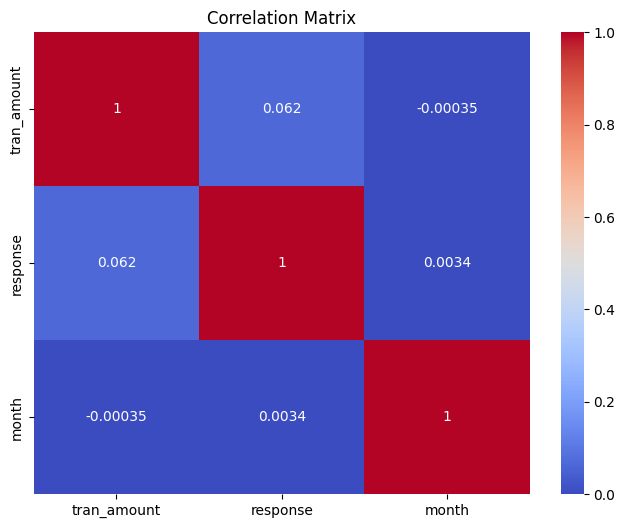

In [78]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The cell at the intersection of tran_amount and response contains the correlation coefficient of approximately 0.0623. This positive correlation suggests a weak positive relationship between the "tran_amount" (transaction amount) and "response" variables.

The cell at the intersection of tran_amount and month contains a very close-to-zero correlation coefficient, indicating a very weak or no linear relationship between "tran_amount" and "month."

The cell at the intersection of response and month shows a correlation coefficient of approximately 0.0034. This very small positive correlation suggests a very weak positive relationship between the "response" and "month" variables.


In summary, the correlation matrix provides insights into the relationships between these variables. In this case, there is a weak positive correlation between "tran_amount" and "response," but there is very little to no linear relationship between "tran_amount" and "month," and "response" and "month."